In [4]:
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from tqdm import tqdm
import pandas as pd
tqdm.pandas(ascii=True)

import tensorflow as tf 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="6"
from keras import backend as K

In [5]:
import keras

In [6]:
keras.__version__

'2.2.5'

In [7]:
from molmap import loadmap
from tensorflow.keras.models import load_model

## Input feature maps

In [8]:
smiles = ['CC(=O)OC1=CC=CC=C1C(O)=O']
mp = loadmap('../../../descriptor_grid_split.mp')
X = mp.batch_transform(smiles, n_jobs = 2)

100%|##########| 1/1 [00:00<00:00, 33.18it/s]


## The model

In [9]:
model = load_model('./solubility_MMND.h5')

In [10]:
train = pd.read_csv('../train.csv')

In [11]:
trainX = mp.batch_transform(train.smiles, n_jobs =8)

100%|##########| 901/901 [02:04<00:00,  7.27it/s]


In [12]:
trainY = train[['measured log solubility in mols per litre']].values

In [13]:
model

In [14]:
import shap
from tensorflow.keras.models import Model
# load JS visualization code to notebook
shap.initjs()

/home/shenwanxiang/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [26]:
mp._S.indices

array([712, 675, 841, ..., 709, 746, 710], dtype=int32)

In [28]:
mp.df_embedding


,x,y,Subtypes,colors,Channels,idx,indices
MolWeight,-5.862484,4.999339,Property,#ff6a00,Property,0,712
MolExactWeight,-5.831477,4.960192,Property,#ff6a00,Property,1,675
MolAverageWeight,-2.289445,5.788054,Property,#ff6a00,Property,2,841
MolHeavyAtomWeight,-5.901183,5.019250,Property,#ff6a00,Property,3,749
MolFilterItLogS,-5.081017,1.481217,Property,#ff6a00,Property,4,163
...,...,...,...,...,...,...,...
ZMIC1,-6.363175,5.137610,InfoContent,#ff0082,InfoContent,1339,782
ZMIC2,-6.475861,4.876422,InfoContent,#ff0082,InfoContent,1340,708
ZMIC3,-6.378228,4.902675,InfoContent,#ff0082,InfoContent,1341,709
ZMIC4,-6.256719,5.015090,InfoContent,#ff0082,InfoContent,1342,746


In [23]:
import shap

# we use the first 100 training examples as our background dataset to integrate over
explainer = shap.DeepExplainer(model, trainX[:100], session=None)

# explain the first 10 predictions
# explaining each prediction requires 2 * background dataset size runs
shap_values = explainer.shap_values(X)

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [ ]:
import shap
import numpy as np

    
# select a set of background examples to take an expectation over
background = trainX[np.random.choice(trainX.shape[0], 100, replace=False)]
layer = model.get_layer('global_max_pooling2d')
activation_model = Model(model.input, layer.output)

e = shap.GradientExplainer(activation_model, background, local_smoothing=100)

shap_values = e.shap_values(background)

# plot the feature attributions
#shap.image_plot(shap_values, -X)


In [ ]:
shap_values[0].shape

In [ ]:
plt.imshow(shap_values[0][0].sum(axis=-1), cmap = 'rainbow')

In [ ]:
plt.imshow(shap_values[0][1].sum(axis=-1), cmap = 'rainbow')

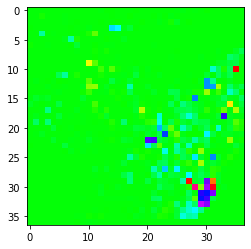

In [66]:
plt.imshow(shap_values[0][99].sum(axis=-1), cmap = 'hsv')

In [20]:

# Executing the graph and storing the value that `e` represents in `result`.
result = sess.run(shap.DeepExplainer((model.layers[1].input, model.layers[-1].output), background))

RuntimeError: The Session graph is empty.  Add operations to the graph before calling run().

In [11]:
from grad_cam import GradCAM
explainer = GradCAM()
n, w, h , c= X.shape
cams = explainer.explain((trainX, 0), model, 'conv2d', 0)
from display import heatmap_display, grid_display


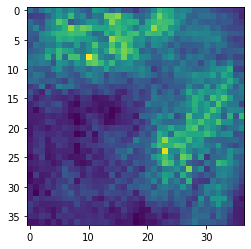

In [184]:
plt.imshow(cv2.resize(cams[0].numpy(), (w, h)))

In [186]:
cams[0].numpy()

array([[0.00926881, 0.0068832 , 0.00981405, ..., 0.0056307 , 0.00488919,
        0.00425324],
       [0.00554613, 0.00567669, 0.00584297, ..., 0.00676989, 0.00583235,
        0.00407923],
       [0.00916761, 0.00724792, 0.00674472, ..., 0.00740552, 0.00564326,
        0.00523994],
       ...,
       [0.00503412, 0.00334151, 0.00424102, ..., 0.00639072, 0.0035826 ,
        0.00332141],
       [0.00440053, 0.00407258, 0.00494036, ..., 0.00515266, 0.00346242,
        0.00344453],
       [0.00264069, 0.00273705, 0.00361813, ..., 0.00472017, 0.0038089 ,
        0.00328387]], dtype=float32)

In [187]:
pip install shap

     |████████████████████████████████| 266kB 7.2MB/s eta 0:00:01
  Stored in directory: /home/shenwanxiang/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


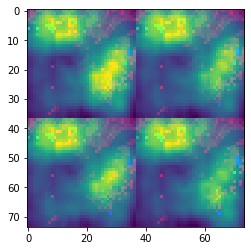

In [162]:
plt.imshow(x)

In [163]:
import cv2

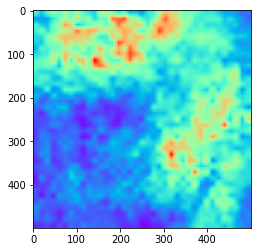

In [83]:
plt.imshow(cv2.resize(cams[200].numpy(), (500,500)), cmap = 'rainbow')

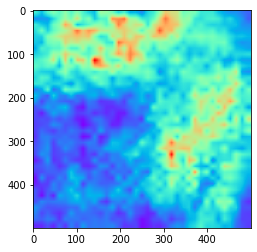

In [84]:
plt.imshow(cv2.resize(cams[10].numpy(), (500,500)), cmap = 'rainbow')

In [31]:
np.log10(10)

1.0

In [35]:
np.log10(10**-12.0)

-12.0